## **Time Series (NLP)**

**Heart rate prediction**

Introduction:

Sudden variations in heart rate could lead to the risks of stroke, heart failure, sudden cardiac arrest,
and even death. Therefore, monitoring the heart rate is critical as it helps to discover the irregularities
of the heart’s function to detect health problems. With the advancements in AI and stream processing
technologies, more accurate future predictions can be made, allowing healthcare sectors to detect
and treat such situations at early stages.

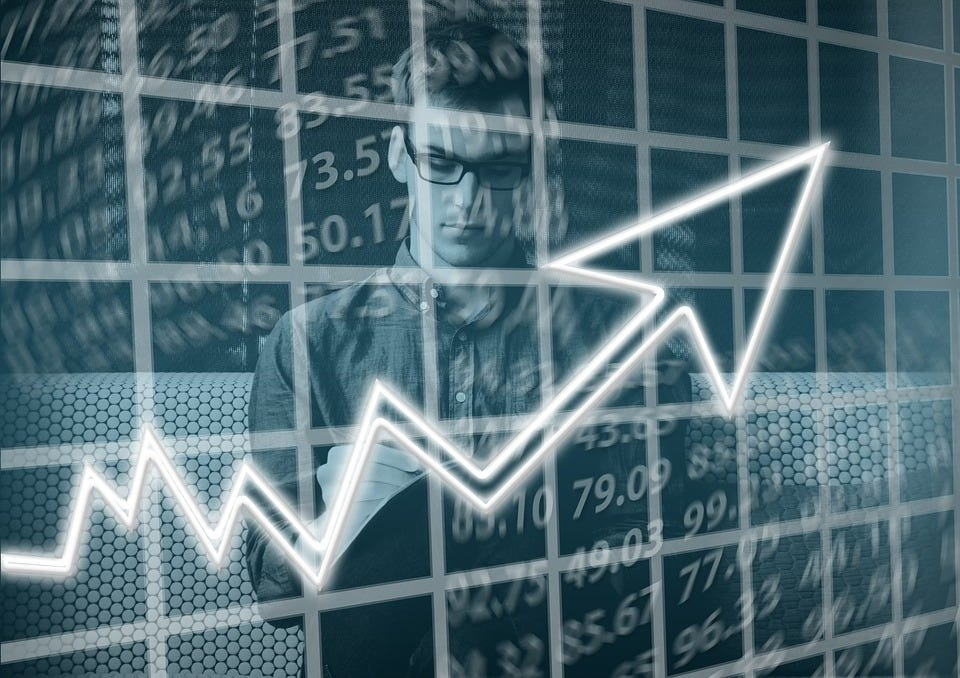

Task Description:

In this task, a time series collected using medical sensors, approximately four hours of
data for a patient. Using these data, build an effective time series model to predict the
next twenty (20) observations (minutes) of heart rate data (Lifetouch Heart Rate).

PT_Train.csv

To experiment with different time series models and
Training data for modelling and to use with future predictions.

Time Series:

Time series analysis plays a pivotal role in understanding temporal patterns inherent in textual data. Time series methods provide a structured framework for dissecting linguistic trends and variations over time. By treating text as a sequence of events, NLP practitioners harness time series techniques to unveil evolving language dynamics, sentiment shifts, and contextual changes within textual corpora. Through the lens of time series analysis, NLP delves into the temporal dimension of language evolution, enabling insights into historical trends and predictive modeling of linguistic behaviors. This intersection empowers researchers to explore the evolution of language, track semantic drift, and anticipate future linguistic patterns. Leveraging time series in NLP unlocks a deeper understanding of how language usage evolves in response to societal, cultural, and technological influences.

In [2]:
#import shutil to unzip the file
import shutil
shutil.unpack_archive('/content/drive/MyDrive/Time series dataset.zip')


Import libraries and load the dataset.

In [3]:

import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import itertools
df = pd.read_csv('/content/PT_Train.csv')
df.head()

Timestamp (GMT)  Lifetouch Heart Rate  Lifetouch Respiration Rate  \
0  17/08/2015 15:09                   139                          41   
1  17/08/2015 15:10                   144                          40   
2  17/08/2015 15:11                   140                          42   
3  17/08/2015 15:12                   138                          45   
4  17/08/2015 15:13                   133                          42   

   Oximeter SpO2  Oximeter Pulse  
0            NaN             NaN  
1           92.0           140.0  
2           89.0           144.0  
3           93.0           141.0  
4           94.0           134.0

In [4]:
df.tail()

Timestamp (GMT)  Lifetouch Heart Rate  Lifetouch Respiration Rate  \
221  17/08/2015 18:50                   159                          51   
222  17/08/2015 18:51                   151                          64   
223  17/08/2015 18:52                   140                          64   
224  17/08/2015 18:53                   140                          55   
225  17/08/2015 18:54                   138                          54   

     Oximeter SpO2  Oximeter Pulse  
221            NaN             NaN  
222            NaN             NaN  
223            NaN             NaN  
224            NaN             NaN  
225            NaN             NaN

df.describe()- It provides descriptive statistics of the DataFrame, offering insights into its numerical data such as mean, standard deviation, minimum, maximum, and quartiles.
It offers a concise summary of the distribution and central tendency of the numeric columns within the DataFrame.

In [5]:
# To check the statistical summary
df.describe()

Lifetouch Heart Rate  Lifetouch Respiration Rate  Oximeter SpO2  \
count            226.000000                  226.000000     191.000000   
mean            2315.615044                 2219.216814      83.450262   
std            11351.588825                11370.093548      29.802974   
min              106.000000                   34.000000      -1.000000   
25%              136.000000                   38.000000      92.000000   
50%              145.000000                   46.000000      93.000000   
75%              156.000000                   53.000000      95.000000   
max            61442.000000                61442.000000      98.000000   

       Oximeter Pulse  
count      191.000000  
mean       126.335079  
std         46.348142  
min         -1.000000  
25%        134.000000  
50%        139.000000  
75%        149.000000  
max        166.000000

To check the Null values in the dataset.

In [6]:
df.isna().sum()

Timestamp (GMT)                0
Lifetouch Heart Rate           0
Lifetouch Respiration Rate     0
Oximeter SpO2                 35
Oximeter Pulse                35
dtype: int64

Get DataFrame in Dataset Object returned by statistic models.

In [7]:
print(df.shape)
df.head(10)

(226, 5)


Timestamp (GMT)  Lifetouch Heart Rate  Lifetouch Respiration Rate  \
0  17/08/2015 15:09                   139                          41   
1  17/08/2015 15:10                   144                          40   
2  17/08/2015 15:11                   140                          42   
3  17/08/2015 15:12                   138                          45   
4  17/08/2015 15:13                   133                          42   
5  17/08/2015 15:14                   132                          41   
6  17/08/2015 15:15                   132                          47   
7  17/08/2015 15:16                   133                          44   
8  17/08/2015 15:17                   136                          45   
9  17/08/2015 15:18                   137                          42   

   Oximeter SpO2  Oximeter Pulse  
0            NaN             NaN  
1           92.0           140.0  
2           89.0           144.0  
3           93.0           141.0  
4           94.0           134.0  
5           92.0           134.0  
6           92.0           135.0  
7           92.0           135.0  
8           94.0           136.0  
9           93.0           138.0

impute missing values.

dataframe.bfill() is used to backward fill the missing values in the dataset.

In [8]:
df = df.fillna(df.bfill())
df.head()

Timestamp (GMT)  Lifetouch Heart Rate  Lifetouch Respiration Rate  \
0  17/08/2015 15:09                   139                          41   
1  17/08/2015 15:10                   144                          40   
2  17/08/2015 15:11                   140                          42   
3  17/08/2015 15:12                   138                          45   
4  17/08/2015 15:13                   133                          42   

   Oximeter SpO2  Oximeter Pulse  
0           92.0           140.0  
1           92.0           140.0  
2           89.0           144.0  
3           93.0           141.0  
4           94.0           134.0

Plot time series using two attribute 'Lifetouch Heart rate' and 'Lifetouch Respiration Rate'.

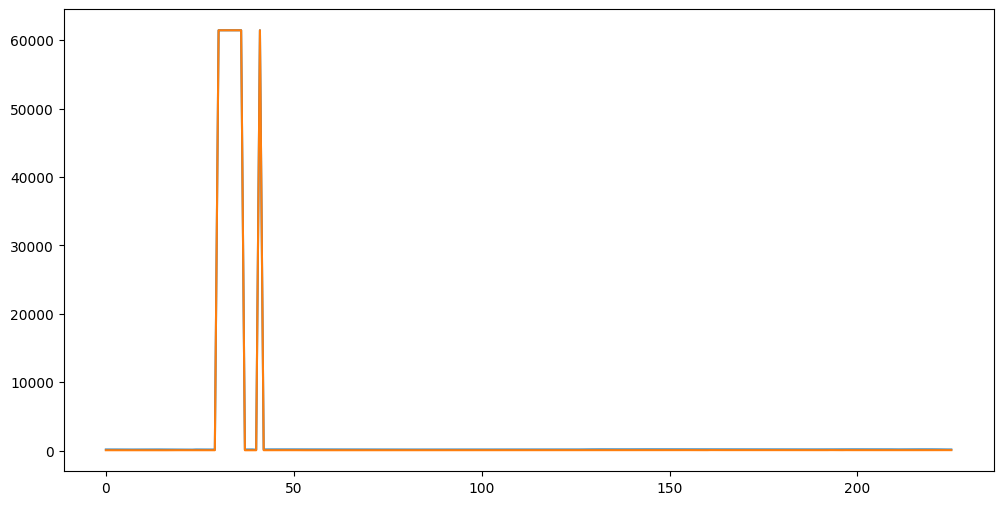

In [9]:
import matplotlib.pyplot as plt
# plot time series
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Lifetouch Heart Rate'],df['Lifetouch Respiration Rate'])
plt.show()

Using statsmodels, the function check_stationarity evaluates the stationarity of a given time series. It utilizes the KPSS test to compute the p-value and determine stationarity. The result is printed indicating whether the series is stationary or not based on the significance level of 0.05.

In [10]:
import statsmodels.api as sm
# check stationarity of the series
def check_stationarity(series):
  statistic, p_value, n_lags, critical_values = sm.tsa.stattools.kpss(series)
  print(f'p value: {p_value}')
  print(f'Result: The series is {"not " if p_value < 0.05 else ""}stationary \n')


Ensure stationarity of 'Lifetouch Heart Rate' and 'Lifetouch Respiration Rate' data to validate time series analysis and forecasting accuracy.

In [11]:
check_stationarity(df['Lifetouch Heart Rate'])
check_stationarity(df['Lifetouch Respiration Rate'])

p value: 0.1
Result: The series is stationary 

p value: 0.1
Result: The series is stationary 



<ipython-input-10-0d856ea82609>:4: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  statistic, p_value, n_lags, critical_values = sm.tsa.stattools.kpss(series)
<ipython-input-10-0d856ea82609>:4: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  statistic, p_value, n_lags, critical_values = sm.tsa.stattools.kpss(series)


Using SARIMAX modeling with non-seasonal ARIMA(0, 0, 1) and no seasonal component, the heart rate data from Lifetouch is analyzed while allowing for non-stationarity and invertibility. Upon fitting the model to the data, a summary of the model's performance is printed for further analysis and interpretation.

In [12]:
model = sm.tsa.statespace.SARIMAX(df['Lifetouch Heart Rate'],
                                  order=(0, 0, 1),
                                  seasonal_order=(0, 0, 0, 12),
                                  enforce_stationarity=False,
                                  enforce_invertibility=False)
# train model
model_fit = model.fit()
print(model_fit.summary())

                                SARIMAX Results                                 
Dep. Variable:     Lifetouch Heart Rate   No. Observations:                  226
Model:                 SARIMAX(0, 0, 1)   Log Likelihood               -2363.962
Date:                  Thu, 29 Feb 2024   AIC                           4731.925
Time:                          17:04:54   BIC                           4738.748
Sample:                               0   HQIC                          4734.679
                                  - 226                                         
Covariance Type:                    opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.6045      0.028     21.838      0.000       0.550       0.659
sigma2      1.118e+08   4.65e-11   2.41e+18      0.000    1.12e+08    1.12e+08
Ljung-Box (L1) (Q):                 

The SARIMAX model is fitted to 'Lifetouch Respiration Rate' data with a non-seasonal order of ARIMA(0, 0, 1) and a seasonal order of SARIMA(0, 0, 0, 12), allowing for possible trends and seasonality. Stationarity and invertibility are not enforced during model estimation.

Upon training the model, a summary containing statistical information such as coefficients, standard errors, and goodness-of-fit measures is printed, providing insights into the model's performance and parameters.






In [13]:
model = sm.tsa.statespace.SARIMAX(df['Lifetouch Respiration Rate'],
                                  order=(0, 0, 1),
                                  seasonal_order=(0, 0, 0, 12),
                                  enforce_stationarity=False,
                                  enforce_invertibility=False)
# train model
model_fit = model.fit()
print(model_fit.summary())

                                   SARIMAX Results                                    
Dep. Variable:     Lifetouch Respiration Rate   No. Observations:                  226
Model:                       SARIMAX(0, 0, 1)   Log Likelihood               -2364.017
Date:                        Thu, 29 Feb 2024   AIC                           4732.034
Time:                                17:04:55   BIC                           4738.858
Sample:                                     0   HQIC                          4734.789
                                        - 226                                         
Covariance Type:                          opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.6040      0.028     21.844      0.000       0.550       0.658
sigma2      1.117e+08   4.63e-11   2.41e+18      0.000    1.12e+08 

Checking if there is any null values in dataset.

In [14]:
x = df.isnull().sum()
y = (df.isnull().sum()/df.shape[0])*100
z = {'total number of missing values':x,'percentage of missing values':y}
fn = pd.DataFrame(z,columns=['total number of missing values','percentage of missing values'])
fn.sort_values(by='percentage of missing values', ascending=False)
print(fn)

                            total number of missing values  \
Timestamp (GMT)                                          0   
Lifetouch Heart Rate                                     0   
Lifetouch Respiration Rate                               0   
Oximeter SpO2                                            8   
Oximeter Pulse                                           8   

                            percentage of missing values  
Timestamp (GMT)                                 0.000000  
Lifetouch Heart Rate                            0.000000  
Lifetouch Respiration Rate                      0.000000  
Oximeter SpO2                                   3.539823  
Oximeter Pulse                                  3.539823  



After removing the 'Oximeter SpO2' and 'Oximeter Pulse' columns from the dataframe 'df', the modified dataset is stored in the variable 'dataset'.

In [15]:
dataset = df.drop(['Oximeter SpO2','Oximeter Pulse'],axis=1)

Outliers:
       Timestamp (GMT)  Lifetouch Heart Rate  Lifetouch Respiration Rate
30 2015-08-17 15:39:00                 61441                       61441
31 2015-08-17 15:40:00                 61442                       61442
32 2015-08-17 15:41:00                 61441                       61441
33 2015-08-17 15:42:00                 61441                       61441
34 2015-08-17 15:43:00                 61441                       61441
35 2015-08-17 15:44:00                 61441                       61441
36 2015-08-17 15:45:00                 61442                       61442
41 2015-08-17 15:50:00                 61442                       61442


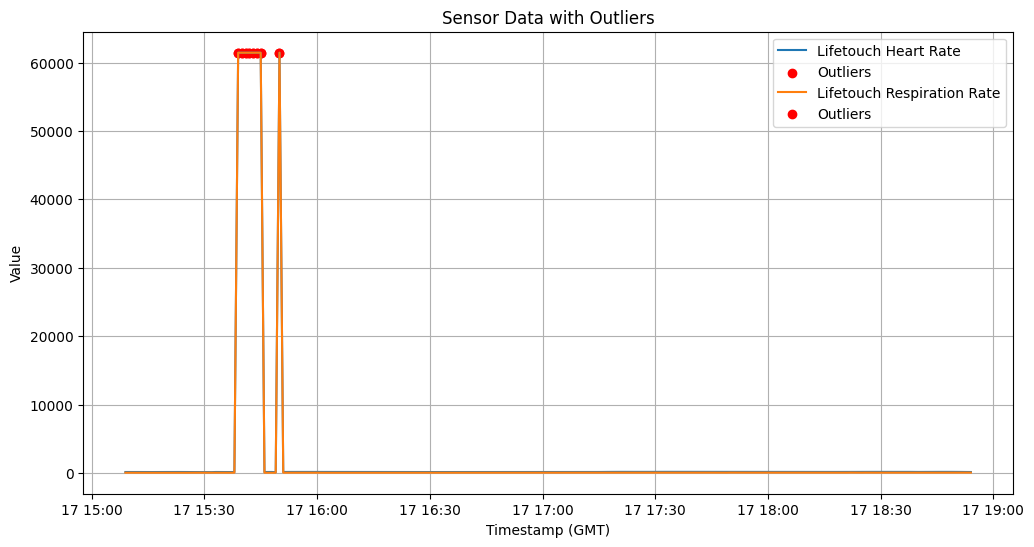

In [16]:
import numpy as np
df = pd.DataFrame(dataset)
df['Timestamp (GMT)'] = pd.to_datetime(df['Timestamp (GMT)'])

df.fillna(method='ffill', inplace=True)
def outliers_find(data, threshold=3):
    scores = np.abs((data - data.mean()) / data.std())
    return scores > threshold
num = df.select_dtypes(include=np.number).columns
outliers = df[num].apply(outliers_find)
print("Outliers:")
print(df[outliers.any(axis=1)])

# Step 5: Visualize outliers
plt.figure(figsize=(12, 6))
for column in num:
    plt.plot(df['Timestamp (GMT)'], df[column], label=column)
    plt.scatter(df[outliers[column]]['Timestamp (GMT)'], df[outliers[column]][column], color='red', marker='o', label='Outliers')
plt.title('Sensor Data with Outliers')
plt.xlabel('Timestamp (GMT)')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()



In Python, to handle outliers in a dataset's 'Lifetouch Heart Rate' column,
We can use the apply() function along with a lambda expression.
This line of code replaces any value greater than 60000 with NaN,
Ensuring data integrity and removing extreme values that might skew analysis.



*   By leveraging NumPy's nan function, we maintain consistency in the dataset.
*   This approach facilitates robust data preprocessing and enhances model performance.


*   Efficiently handling outliers is crucial for accurate insights and predictions.
*   Such transformations contribute to the overall reliability of data-driven processes.


In [17]:
dataset['Lifetouch Heart Rate'] = dataset['Lifetouch Heart Rate'].apply(lambda x: np.nan if x > 60000 else x)


Creating a sizable plot window with dimensions 10x6.

Plotting Lifetouch Heart Rate against Timestamp.

Title set as 'Lifetouch Heart Rate Over Time'.

Axes labeled for Time and Heart Rate, with legend displayed.

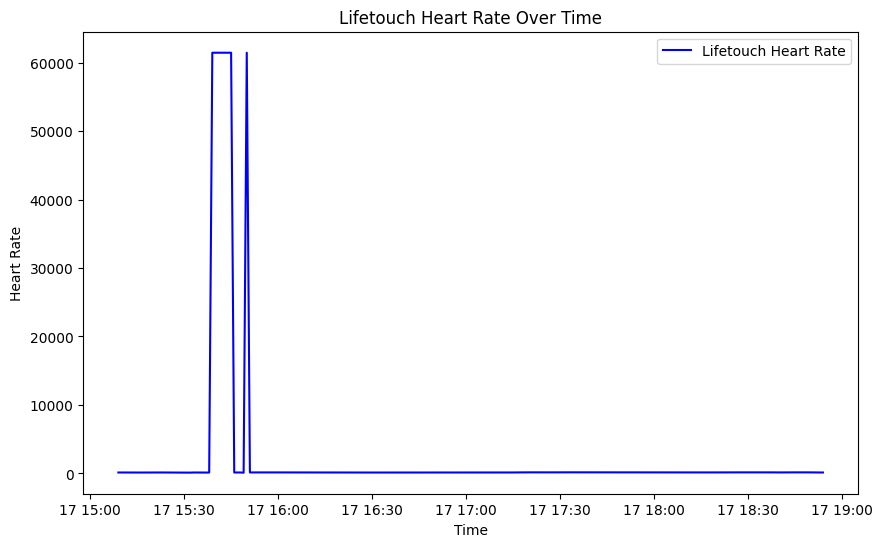

In [18]:
plt.figure(figsize=(10, 6))
plt.plot(df['Timestamp (GMT)'], df['Lifetouch Heart Rate'], label='Lifetouch Heart Rate', color='blue')
plt.title('Lifetouch Heart Rate Over Time')
plt.xlabel('Time')
plt.ylabel('Heart Rate')
plt.legend()
plt.show()

Creating a DataFrame from the dataset using Pandas: dtf = pd.DataFrame(dataset).
Converting the 'Timestamp (GMT)' column to datetime: dtf['Timestamp (GMT)'] = pd.to_datetime(dtf['Timestamp (GMT)']).
Setting the datetime column as the index: dtf.set_index('Timestamp (GMT)', inplace=True).
Now, 'Timestamp (GMT)' serves as the index for further analysis.

Performing the Augmented Dickey-Fuller test:


*   Assessing stationarity of Lifetouch Heart Rate.
*   Obtained ADF Statistic and associated p-value.
*   Printing Critical Values for further analysis.

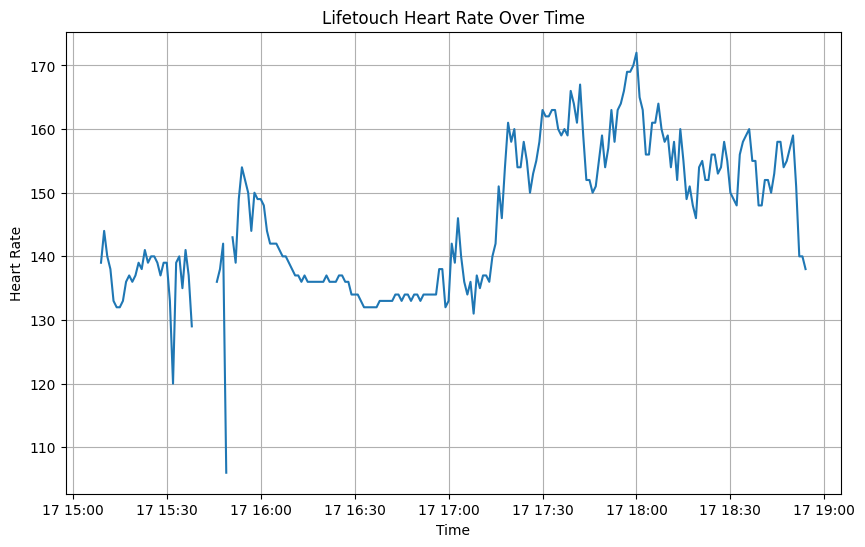

ADF Statistic: -3.8522769199662608
p-value: 0.002415527582011085
Critical Values:
   1%: -3.4612821203214907
   5%: -2.875142613826617
   10%: -2.574020122281422


In [19]:
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt

dtf = pd.DataFrame(dataset)
dtf['Timestamp (GMT)'] = pd.to_datetime(dtf['Timestamp (GMT)'])
dtf.set_index('Timestamp (GMT)', inplace=True)

# Plot the time series
plt.figure(figsize=(10, 6))
plt.plot(dtf.index, dtf['Lifetouch Heart Rate'])
plt.title('Lifetouch Heart Rate Over Time')
plt.xlabel('Time')
plt.ylabel('Heart Rate')
plt.grid(True)
plt.show()

# Perform the Augmented Dickey-Fuller test
result = adfuller(df['Lifetouch Heart Rate'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:')
for key, value in result[4].items():
    print(f'   {key}: {value}')

Performing the Augmented Dickey-Fuller test:

*   Assessing stationarity of Lifetouch Respiration Rate.
*   ADF Statistic: obtained test statistic value.
*   P-value: indicating the significance of the test.


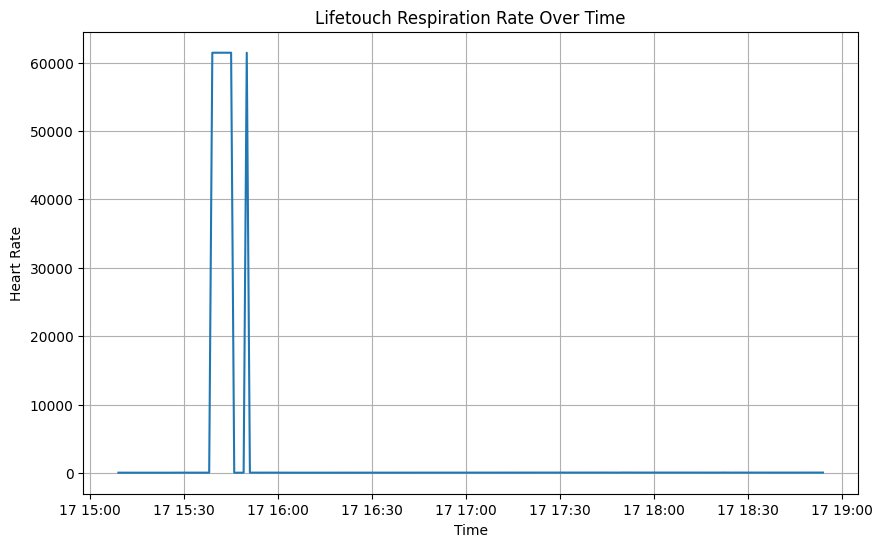

ADF Statistic: -3.8515290453341726
p-value: 0.00242198549710726
Critical Values:
   1%: -3.4612821203214907
   5%: -2.875142613826617
   10%: -2.574020122281422


In [20]:
dtf = pd.DataFrame(dataset)
dtf['Timestamp (GMT)'] = pd.to_datetime(dtf['Timestamp (GMT)'])
dtf.set_index('Timestamp (GMT)', inplace=True)

# Plot the time series
plt.figure(figsize=(10, 6))
plt.plot(dtf.index, dtf['Lifetouch Respiration Rate'])
plt.title('Lifetouch Respiration Rate Over Time')
plt.xlabel('Time')
plt.ylabel('Heart Rate')
plt.grid(True)
plt.show()

# Perform the Augmented Dickey-Fuller test
result = adfuller(dtf['Lifetouch Respiration Rate'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:')
for key, value in result[4].items():
    print(f'   {key}: {value}')

ADF Statistic: -3.8515290453341726

p-value: 0.00242198549710726

Critical Values:
   1%: -3.4612821203214907
   5%: -2.875142613826617
   10%: -2.574020122281422

Logarithmic transformations:

Enhancing 'Log-HeartRate' with mathematical forms.

Logarithmic essence applied, a new dimension unfolds.

Completing the dataset, insights multiply and hold.

In [21]:
# add new column 'Log-HeartRate' with log transformed values
dataset['Log-HeartRate'] = np.log(dataset['Lifetouch Heart Rate'])
dataset['Log-Respiration-Rate'] = np.log(dataset['Lifetouch Respiration Rate'])
dataset['Log-HeartRate'].fillna(value=dataset['Log-HeartRate'].mean(), inplace=True)

Display Data shape.

In [22]:
print(dataset.shape)
dataset.head()

(226, 5)


Timestamp (GMT)  Lifetouch Heart Rate  Lifetouch Respiration Rate  \
0 2015-08-17 15:09:00                 139.0                          41   
1 2015-08-17 15:10:00                 144.0                          40   
2 2015-08-17 15:11:00                 140.0                          42   
3 2015-08-17 15:12:00                 138.0                          45   
4 2015-08-17 15:13:00                 133.0                          42   

   Log-HeartRate  Log-Respiration-Rate  
0       4.934474              3.713572  
1       4.969813              3.688879  
2       4.941642              3.737670  
3       4.927254              3.806662  
4       4.890349              3.737670

Performing the Augmented Dickey-Fuller test:


*   Assessing stationarity of 'Log-HeartRate' series best.
*   Printing ADF Statistic and the p-value with zest.
*   Critical values scrutinized for the statistical quest.

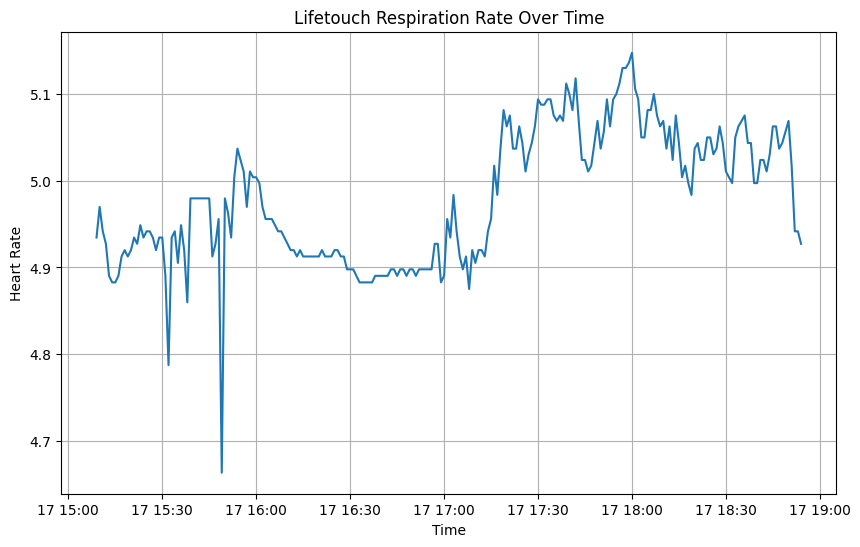

ADF Statistic: -2.3060549351951964
p-value: 0.17002257045598118
Critical Values:
   1%: -3.460154163751041
   5%: -2.874648939216792
   10%: -2.5737567259151044


In [23]:
dtf = pd.DataFrame(dataset)
dtf['Timestamp (GMT)'] = pd.to_datetime(dtf['Timestamp (GMT)'])
dtf.set_index('Timestamp (GMT)', inplace=True)

# Plot the time series
plt.figure(figsize=(10, 6))
plt.plot(dtf.index, dtf['Log-HeartRate'])
plt.title('Lifetouch Respiration Rate Over Time')
plt.xlabel('Time')
plt.ylabel('Heart Rate')
plt.grid(True)
plt.show()

# Perform the Augmented Dickey-Fuller test
result = adfuller(dtf['Log-HeartRate'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:')
for key, value in result[4].items():
    print(f'   {key}: {value}')

ADF Statistic: -2.3060549351951964

p-value: 0.17002257045598118

Critical Values:
   1%: -3.460154163751041
   5%: -2.874648939216792
   10%: -2.5737567259151044


Performing the Augmented Dickey-Fuller test:

*   Result obtained for log-transformed Respiration Rate.
*   ADF Statistic: displayed alongside result[0].
*   p-value: reflecting significance in result[1].
*   Critical values are shown iteratively for assessment.

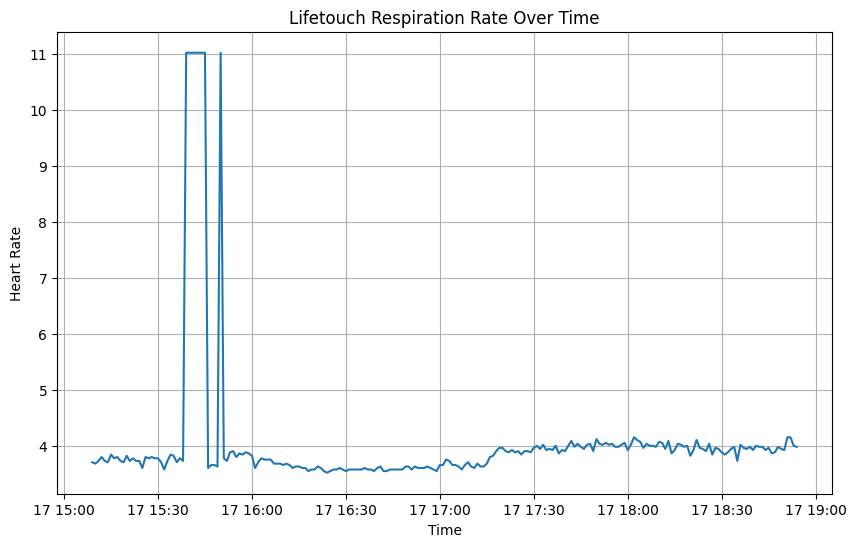

ADF Statistic: -3.8116583237782096
p-value: 0.002790262216641672
Critical Values:
   1%: -3.4612821203214907
   5%: -2.875142613826617
   10%: -2.574020122281422


In [24]:
dtf_log = pd.DataFrame(dataset)
dtf_log['Timestamp (GMT)'] = pd.to_datetime(dtf_log['Timestamp (GMT)'])
dtf_log.set_index('Timestamp (GMT)', inplace=True)

# Plot the time series
plt.figure(figsize=(10, 6))
plt.plot(dtf_log.index, dtf_log['Log-Respiration-Rate'])
plt.title('Lifetouch Respiration Rate Over Time')
plt.xlabel('Time')
plt.ylabel('Heart Rate')
plt.grid(True)
plt.show()

# Perform the Augmented Dickey-Fuller test
result = adfuller(dtf_log['Log-Respiration-Rate'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:')
for key, value in result[4].items():
    print(f'   {key}: {value}')

**Deseasonalisation:**

Deseasonalisation in time series strips away recurring patterns to reveal underlying trends. By removing seasonal fluctuations, analysts can better detect long-term changes and make more accurate forecasts. This technique is essential for understanding true performance outside of seasonal variations. Through deseasonalisation, data becomes clearer, aiding in decision-making and trend analysis.



*   Removing patterns from HeartRate, dataset's core thrall.
*   With a simple diff function, seasonal fluctuations fall.
*   Imputing the gaps with means, ensuring no data stall.

In [25]:
# Deseasonalisation
dataset['deseasonalization-HeartRate'] = dataset[['Log-HeartRate']].diff(axis=0)
dataset['deseasonalization-HeartRate'].fillna(value=dataset['deseasonalization-HeartRate'].mean(), inplace=True)

ADF Statistic: -16.076467368713047
p-value: 5.436394230418484e-29
Critical Values:
   1%: -3.459884913337196
   5%: -2.8745310704320794
   10%: -2.573693840082908


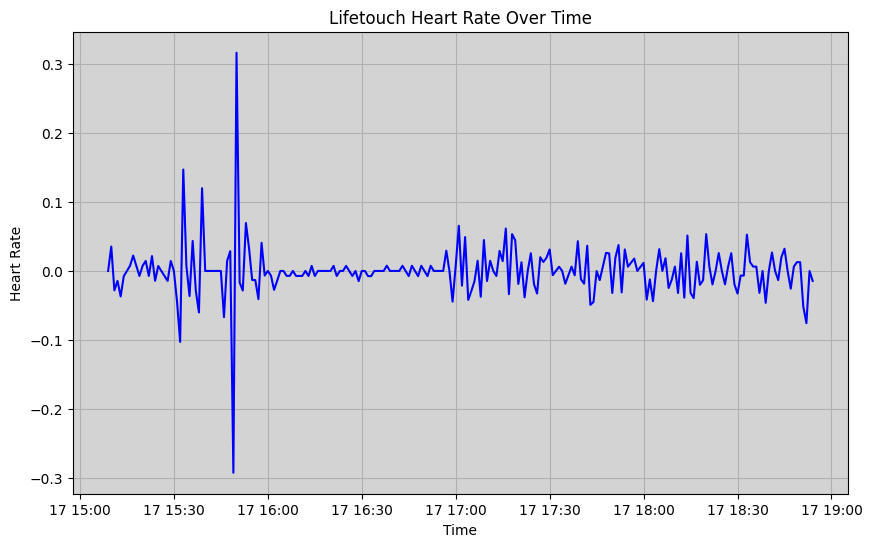

In [26]:
dtf_log_d = pd.DataFrame(dataset)
dtf_log_d['Timestamp (GMT)'] = pd.to_datetime(dtf_log_d['Timestamp (GMT)'])
dtf_log_d.set_index('Timestamp (GMT)', inplace=True)

# Plot the time series
plt.figure(figsize=(10, 6))
plt.plot(dtf_log_d.index, dtf_log_d['deseasonalization-HeartRate'], color='blue')
plt.title('Lifetouch Heart Rate Over Time')
plt.xlabel('Time')
plt.ylabel('Heart Rate')
plt.grid(True)
plt.gca().set_facecolor('lightgray')
result = adfuller(dtf_log_d['deseasonalization-HeartRate'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:')
for key, value in result[4].items():
    print(f'   {key}: {value}')

ADF Statistic: -16.076467368713047

p-value: 5.436394230418484e-29

Critical Values:
   1%: -3.459884913337196
   5%: -2.8745310704320794
   10%: -2.573693840082908


In [27]:
df.head()

Timestamp (GMT)  Lifetouch Heart Rate  Lifetouch Respiration Rate
0 2015-08-17 15:09:00                   139                          41
1 2015-08-17 15:10:00                   144                          40
2 2015-08-17 15:11:00                   140                          42
3 2015-08-17 15:12:00                   138                          45
4 2015-08-17 15:13:00                   133                          42

Dividing the dataset for training and test bit by bit.

Witness the training set's shape take its form.

While the test set prepares, adhering to the norm.

In [28]:
data_resize = int(len(dataset) * 0.8)

train_data = dataset[:data_resize]
test_data = dataset[data_resize:]

print("Train set shape:", train_data.shape)
print("Test set shape:", test_data.shape)

Train set shape: (180, 6)
Test set shape: (46, 6)


Convert the 'Timestamp (GMT)' column to datetime format and set it as the index for the dataset, ensuring time series alignment. Then, specify the frequency of the index as one minute ('T') for temporal analysis at minute intervals.

In [29]:
dataset['Timestamp (GMT)'] = pd.to_datetime(dataset['Timestamp (GMT)'])
dataset.set_index('Timestamp (GMT)', inplace=True)
dataset.index.freq = 'T'

In [30]:
train_data.set_index('Timestamp (GMT)', inplace=True)
test_data.set_index('Timestamp (GMT)', inplace=True)

It removes rows with missing values in the 'deseasonalization-HeartRate' column from the train_data DataFrame. This ensures data integrity by eliminating incomplete observations before analysis.

In [31]:
train_data = train_data.dropna(subset=['deseasonalization-HeartRate'])

In [32]:
train_data.tail()

Lifetouch Heart Rate  Lifetouch Respiration Rate  \
Timestamp (GMT)                                                         
2015-08-17 18:04:00                 156.0                          59   
2015-08-17 18:05:00                 161.0                          53   
2015-08-17 18:06:00                 161.0                          57   
2015-08-17 18:07:00                 164.0                          55   
2015-08-17 18:08:00                 160.0                          55   

                     Log-HeartRate  Log-Respiration-Rate  \
Timestamp (GMT)                                            
2015-08-17 18:04:00       5.049856              4.077537   
2015-08-17 18:05:00       5.081404              3.970292   
2015-08-17 18:06:00       5.081404              4.043051   
2015-08-17 18:07:00       5.099866              4.007333   
2015-08-17 18:08:00       5.075174              4.007333   

                     deseasonalization-HeartRate  
Timestamp (GMT)                                   
2015-08-17 18:04:00                     0.000000  
2015-08-17 18:05:00                     0.031548  
2015-08-17 18:06:00                     0.000000  
2015-08-17 18:07:00                     0.018462  
2015-08-17 18:08:00                    -0.024693

It defines a function fit_arima that attempts to find the best ARIMA model parameters for a given dataset. It iterates through combinations of specified ranges for the ARIMA parameters (p, d, q), fits ARIMA models, and selects the model with the lowest AIC (Akaike Information Criterion) value. If an error occurs during model fitting, it prints an error message. Then, it applies this function to a dataset named 'Lifetouch Heart Rate', with predefined ranges for p, d, and q. Finally, it prints the best ARIMA parameters along with their corresponding AIC value.

In [33]:
import numpy as np
import itertools
from statsmodels.tsa.arima.model import ARIMA

def fit_arima(data, p_range, d_range, q_range):
    best_aic = np.inf
    best_pdq = None

    for p, d, q in itertools.product(p_range, d_range, q_range):
        try:
            model = ARIMA(data, order=(p, d, q))
            results = model.fit()
            if results.aic < best_aic:
                best_aic = results.aic
                best_pdq = (p, d, q)

        except Exception as e:
            print(f'Error fitting ARIMA model with parameters {(p, d, q)}: {e}')

    return best_pdq, best_aic
p = d = q = range(0, 3)
best_pdq, best_aic = fit_arima(dataset['Lifetouch Heart Rate'], p, d, q)

print(f'Best ARIMA parameters: {best_pdq} with AIC: {best_aic}')

Best ARIMA parameters: (2, 1, 1) with AIC: 1288.0609268038124


It fits an ARIMA (AutoRegressive Integrated Moving Average) model to the 'Lifetouch Heart Rate' dataset with parameters (2,1,1), indicating autoregression of order 2, differencing of order 1, and moving average of order 1, then it obtains the fitted model.

In [34]:
model = ARIMA(dataset['Lifetouch Heart Rate'], order=(2,1,1))
model_fit = model.fit()

In [35]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                SARIMAX Results                                 
================================================================================
Dep. Variable:     Lifetouch Heart Rate   No. Observations:                  226
Model:                   ARIMA(2, 1, 1)   Log Likelihood                -640.030
Date:                  Thu, 29 Feb 2024   AIC                           1288.061
Time:                          17:05:04   BIC                           1301.725
Sample:                      08-17-2015   HQIC                          1293.576
                           - 08-17-2015                                         
Covariance Type:                    opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7851      0.122     -6.421      0.000      -1.025      -0.545
ar.L2         -0.3522      0.040     -8.914      0.000      -0.430      -0.275
ma.L1          0.5765      0.133      4.334      0.000       0.316       0.837
sigma2        21.0887      0.836     25.233      0.000      19.451      22.727
===================================================================================
Ljung-Box (L1) (Q):                   0.98   Jarque-Bera (JB):              2187.07
Prob(Q):                              0.32   Prob(JB):                         0.00
Heteroskedasticity (H):               0.51   Skew:                            -1.59
Prob(H) (two-sided):                  0.00   Kurtosis:                        17.94
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

The variable prediction_start_time holds the first timestamp, while prediction_end_time holds the last timestamp in the test data index

In [36]:
##prediction
prediction_start_time=test_data.index[0]
prediction_end_time=test_data.index[-1]

In [37]:
prediction_end_time

Timestamp('2015-08-17 18:54:00')

It utilizes a trained model ("model_fit") to generate predictions for a specified time period, beginning at "prediction_start_time" and ending at "prediction_end_time".

It signifies the application of time series forecasting, where the model predicts future data points based on historical patterns within the specified timeframe.

In [38]:
prediction = model_fit.predict(start=prediction_start_time, end=prediction_end_time)

In [39]:
prediction

Timestamp (GMT)
2015-08-17 18:09:00    159.969178
2015-08-17 18:10:00    159.843806
2015-08-17 18:11:00    158.432825
2015-08-17 18:12:00    155.017892
2015-08-17 18:13:00    158.339684
2015-08-17 18:14:00    151.647121
2015-08-17 18:15:00    160.647635
2015-08-17 18:16:00    152.852175
2015-08-17 18:17:00    153.250940
2015-08-17 18:18:00    150.245287
2015-08-17 18:19:00    148.356563
2015-08-17 18:20:00    147.268282
2015-08-17 18:21:00    152.304251
2015-08-17 18:22:00    152.951389
2015-08-17 18:23:00    153.454688
2015-08-17 18:24:00    152.217970
2015-08-17 18:25:00    155.039849
2015-08-17 18:26:00    155.144733
2015-08-17 18:27:00    154.118927
2015-08-17 18:28:00    154.202912
2015-08-17 18:29:00    156.696332
2015-08-17 18:30:00    154.968639
2015-08-17 18:31:00    152.117788
2015-08-17 18:32:00    149.748714
2015-08-17 18:33:00    148.129190
2015-08-17 18:34:00    154.608736
2015-08-17 18:35:00    155.567232
2015-08-17 18:36:00    159.489464
2015-08-17 18:37:00    159.15700

In [40]:
test_data['Predicted'] = prediction

<ipython-input-40-4f4b8550071a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Predicted'] = prediction


In [41]:
test_data.head()

Lifetouch Heart Rate  Lifetouch Respiration Rate  \
Timestamp (GMT)                                                         
2015-08-17 18:09:00                 158.0                          54   
2015-08-17 18:10:00                 159.0                          59   
2015-08-17 18:11:00                 154.0                          58   
2015-08-17 18:12:00                 158.0                          52   
2015-08-17 18:13:00                 152.0                          60   

                     Log-HeartRate  Log-Respiration-Rate  \
Timestamp (GMT)                                            
2015-08-17 18:09:00       5.062595              3.988984   
2015-08-17 18:10:00       5.068904              4.077537   
2015-08-17 18:11:00       5.036953              4.060443   
2015-08-17 18:12:00       5.062595              3.951244   
2015-08-17 18:13:00       5.023881              4.094345   

                     deseasonalization-HeartRate   Predicted  
Timestamp (GMT)                                               
2015-08-17 18:09:00                    -0.012579  159.969178  
2015-08-17 18:10:00                     0.006309  159.843806  
2015-08-17 18:11:00                    -0.031952  158.432825  
2015-08-17 18:12:00                     0.025642  155.017892  
2015-08-17 18:13:00                    -0.038715  158.339684

Imports the mean_squared_error function from the sklearn.metrics module. It then calculates the mean squared error between the 'Lifetouch Heart Rate' values in the test data and their corresponding 'Predicted' values.

In [42]:
from sklearn.metrics import mean_squared_error
mean_squared_error(test_data['Lifetouch Heart Rate'], test_data['Predicted'])

17.694276829527215

 It plots the actual and predicted values of Lifetouch Heart Rate over time, comparing them visually. It sets the title as 'Actual vs Predicted Heart Rate' with appropriate axis labels and a legend for clarity, before displaying the plot with gridlines enabled.

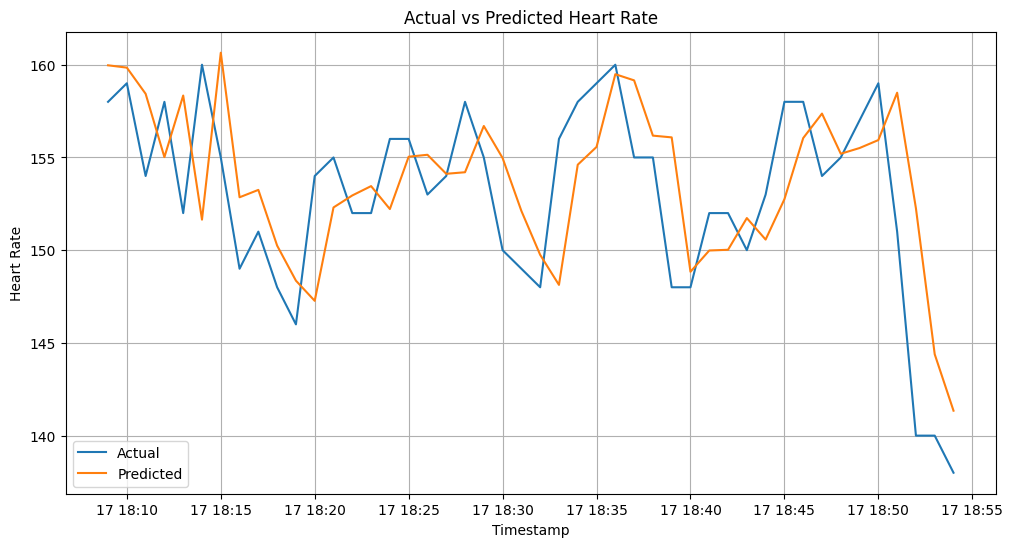

In [43]:
import matplotlib.pyplot as plt

# Plot the actual and predicted values
plt.figure(figsize=(12, 6))
plt.plot(test_data.index, test_data['Lifetouch Heart Rate'], label='Actual')
plt.plot(test_data.index, test_data['Predicted'], label='Predicted')
plt.title('Actual vs Predicted Heart Rate')
plt.xlabel('Timestamp')
plt.ylabel('Heart Rate')
plt.legend()
plt.grid(True)
plt.show()

It visualizes training and test data for Lifetouch Heart Rate alongside predictions, indicating model performance over time. It plots these data points with corresponding timestamps, aiding in evaluating the model's accuracy in predicting heart rates.

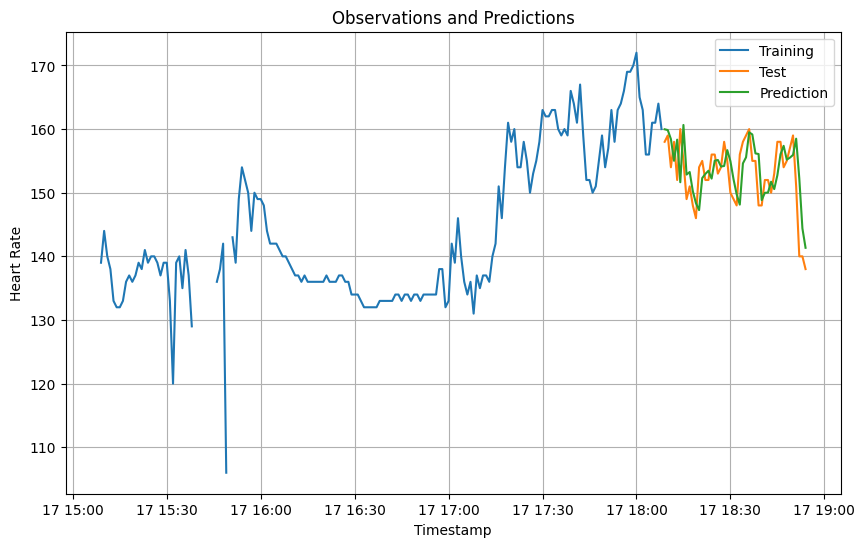

In [44]:
import matplotlib.pyplot as plt

# Plot observations and predictions
plt.figure(figsize=(10, 6))
plt.plot(train_data.index, train_data['Lifetouch Heart Rate'], label='Training')
plt.plot(test_data.index, test_data['Lifetouch Heart Rate'], label='Test')
plt.plot(test_data.index, test_data['Predicted'], label='Prediction')
plt.title('Observations and Predictions')
plt.xlabel('Timestamp')
plt.ylabel('Heart Rate')
plt.legend()
plt.grid(True)
plt.show()

In [45]:
fore = model_fit.get_forecast(steps=20)

In [46]:
fore_val = fore.predicted_mean

In [47]:
fore_val

2015-08-17 18:55:00    137.641861
2015-08-17 18:56:00    138.627438
2015-08-17 18:57:00    137.979778
2015-08-17 18:58:00    138.141151
2015-08-17 18:59:00    138.242558
2015-08-17 19:00:00    138.106106
2015-08-17 19:01:00    138.177522
2015-08-17 19:02:00    138.169510
2015-08-17 19:03:00    138.150648
2015-08-17 19:04:00    138.168279
2015-08-17 19:05:00    138.161079
2015-08-17 19:06:00    138.160522
2015-08-17 19:07:00    138.163495
2015-08-17 19:08:00    138.161357
2015-08-17 19:09:00    138.161989
2015-08-17 19:10:00    138.162246
2015-08-17 19:11:00    138.161822
2015-08-17 19:12:00    138.162064
2015-08-17 19:13:00    138.162023
2015-08-17 19:14:00    138.161970
Freq: T, Name: predicted_mean, dtype: float64

In [48]:
submission = pd.DataFrame({'prediction': fore_val.values})

In [49]:
data = []
for index, row in submission.iterrows():
  data.append({'prediction': row['prediction']})

print(data[0:3])

[{'prediction': 137.64186081125513}, {'prediction': 138.62743816330172}, {'prediction': 137.97977784129282}]


Store the result in Json file.

In [50]:
import json

submission_file_path = 'submission.json'
with open(submission_file_path, 'w') as fp:
  for i in data:
    fp.write(json.dumps(i) + '\n')